In [17]:
%matplotlib inline
import csv
from datetime import datetime
from urlparse import urlparse
import json
import snap

In [18]:
domainToNodeID = json.load(open("domainToNodeID_ALL.txt"))
nodeIDToDomain = {v: k for k, v in domainToNodeID.iteritems()}

LinkGraph = snap.LoadEdgeList(snap.PNGraph, "LinkGraph_ALL_pruned.txt", 0, 1)

In [19]:
leftSet = set(['drudge.com', 'washingtonsources.org', 'akkadiantimes.com', 'deadstate.org', 'thelasource.com', 'americablog.com', 'meduza.io', 'thenewcivilrightsmovement.com', 'newstatesman.com', 'wonkette.com', 'mirror.co.uk', 'libcom.org', 'deepleftfield.info', 'intrepidreport.com', 'rawprogressive.com', 'viraltitle.com', 'worldcantwait.net', 'happy-foxie.com', 'newint.org', 'revcom.us', 'lavendermagazine.com', 'newrepublic.com', 'washingtonpress.com', 'theimproper.com', 'nationofchange.org', 'projectcensored.org', 'peacock-panache.com', 'newpol.org', 'democracyguardian.com', 'dallasvoice.com', 'uproxx.com', 'jezebel.com', 'bluedotdaily.com', 'content.news', 'boingboing.net', 'blacklivesmatter.com', 'reverepress.com', 'whatmattersnews.com', 'au.org', 'hrc.org', 'impeachdjtnow.com', 'leftoverrights.com', 'progressivefrontier.com', 'putintrump.org', 'progressive.org', 'newshounds.us', 'liberationnews.org', 'certifiedpolitics.com', 'angrywhitemen.org', 'forwardprogressives.com', 'theintellectualist.co', 'smirkingchimp.com', 'elitedaily.com', 'leftwingnation.org', 'daily49er.com', 'itsgoingdown.org', 'jacobinmag.com', 'tribunemagazine.org', 'leftscoop.com', 'democraticunderground.com', 'yesmagazine.org', 'newyorker.com', 'theroot.com', 'fifthestate.org', 'electronicintifada.net', 'allthatsfab.com', 'upworthy.com', 'moonofalabama.org', 'themaven.net', 'freepress.org', 'salon.com', 'carbonated.tv', 'mondoweiss.net', 'austinchronicle.com', 'globalvoices.org', 'thedailyvox.co.za', 'yourblackworld.net', 'meanlefthook.com', 'backedbyfact.com', 'gizmodo.com', 'liberalexaminer.com', 'care2.com', 'dctribune.org', 'leftfootforward.org', 'workers.org', 'newslogue.com', 'rewire.news', 'pravdareport.com', 'gq.com', 'foreignpolicyjournal.com', 'redpepper.org.uk', 'act.tv', 'leftsideofhistory.com', 'redyouth.org', 'politicaldig.com', 'crooksandliars.com', 'americanbridgepac.org', 'commondreams.org', 'chicagoreader.com', 'marxist.com', 'dailydot.com', 'nymag.com', 'guardianlv.com', 'telesurtv.net', 'pinknews.co.uk', 'filmingcops.com', 'photographyisnotacrime.com', 'washingtonmonthly.com', 'republicanssucks.org', 'theuspoliticalpost.com', 'ebar.com', 'politicususa.com', 'iowastartingline.com', 'lgbtqnation.com', 'blackagendareport.com', 'foreignpolicynews.org', 'opednews.com', 'thenation.com', 'pastemagazine.com', 'proudemocrat.com', 'thedailybanter.com', 'washingtonjournal.com', 'loveknowledge.org', 'codepink.org', 'worldsocialism.org', 'breitbartunmasked.com', 'samuel-warde.com', 'dailydems.com', 'advocate.com', 'internationalviewpoint.org', 'progressivearmy.com', 'aidc.org.za', 'samefacts.com', 'thefloridasqueeze.com', 'freedomnews.org.uk', 'people.com', 'elisabethparker.com', 'politicalupdater.com', 'earthfirstjournal.org', 'nowthisnews.com', 'wearyourvoicemag.com', 'chroniclesofdemocracy.com', 'thefrisky.com', 'modernliberals.com', 'blue-route.org', 'resilience.org', 'afj.org', 'gopocalypse.org', 'north99.org', 'curvemag.com', 'esquire.com', 'citizencritics.org', 'shadowproof.com', 'readingthepictures.org', 'ir.net', 'leftvoice.org', 'takepart.com', 'democracynow.org', 'other98.com', 'inthesetimes.com', 'scarymommy.com', 'dailykos.com', 'deepstatenation.com', 'feministcurrent.com', 'verrit.com', 'morningstaronline.co.uk', 'currentaffairs.org', 'bust.com', 'dieharddemocrat.com', 'rantt.com', 'littlegreenfootballs.com', 'citypaper.com', 'usuncut.com', 'extranewsfeed.com', 'evonomics.com', 'mashable.com', 'americanprogress.org', 'towleroad.com', 'verifiedpolitics.com', 'syriana-analysis.com', 'nap-sack.org', 'nova-magazine.net', 'tytnetwork.com', 'truth-out.org', 'dissentmagazine.org', 'theguardiansofdemocracy.com', 'redstatedisaster.com', 'nationalmemo.com', 'truthagainstthemachine.com', 'thinkprogress.org', 'countercurrents.org', 'frnewsreport.com', 'zcomm.org', 'mediamatters.org', 'theoswatch.com', 'thegrio.com', 'splinternews.com', 'the-daily.buzz', 'economyincrisis.org', 'texasobserver.org', 'electoral-vote.com', 'antifascistnews.net', 'truthdig.com', 'desmogblog.com', 'liberalamerica.org', 'motherjones.com', 'talkingpointsmemo.com', 'pressprogress.ca', 'ourvoiceny.com', 'addictinginfo.com', 'vox.com', 'everydayfeminism.com', 'merryjane.com', 'vanityfair.com', 'change.org', 'deadspin.com', 'inequalitymedia.org', 'queerty.com', 'rightwingwatch.org', 'front.moveon.org', 'theestablishment.co', 'cnntimes.online', 'pfaw.org', 'revolution-news.com', 'onegreenplanet.org', 'vermontindependent.org', 'prwatch.org', 'slate.com', 'bluenationreview.com', 'greenleft.org.au', 'themilitant.com', 'popularresistance.org', 'ips-dc.org', 'thelily.com', 'whowhatwhy.org', 'readersupportednews.org', 'news.groopspeak.com', 'thesternfacts.com', 'canadiandimension.com', 'rawstory.com', 'vote.us.org', 'molad.org', 'newscorpse.com', 'nowtoronto.com', 'dailynewsbin.com', 'bradford-delong.com', 'dailyrecord.co.uk', 'rabble.ca', 'progressiveliberal.net', 'theburningspear.com', 'bitchmedia.org', 'good.is', 'cnn.com', 'americanindependent.com', 'feministing.com', 'counterpunch.org', 'crimethinc.com', 'middleeastmonitor.com', 'crooked.com', 'huffingtonpost.com', 'freespeech.org', 'climaterealityproject.org', 'firstpost.com', 'egbertowillies.com', 'theoutline.com', 'stpete4peace.org', 'bluestatedaily.com', 'prospect.org', 'msmagazine.com', 'cosmopolitan.com', 'mediaite.com', 'rappler.com', 'villagevoice.com', 'thedailybeast.com', 'socialistworker.org', 'autostraddle.com', 'alternet.org', 'latest.com', 'shareblue.com', 'trofire.com', 'newsweek.com', 'palmerreport.com', 'sourcewatch.org', 'americannewsx.com', 'globetoday.com', 'miaminewtimes.com', 'themarysue.com', 'thewalrus.ca', 'this.org', 'thelondoneconomic.com', 'democratichub.com', 'thecanary.co', 'juancole.com', 'greenvillegazette.com'])

In [20]:
leftCenterSet = set(['helsinkitimes.fi', 'indystar.com', 'news.trust.org', 'canadalandshow.com', 'lapresse.ca', 'timescolonist.com', 'ahtribune.com', 'rudaw.net', 'berkshireeagle.com', 'almasdarnews.com', 'theatlantic.com', 'wgntv.com', 'thenewstribune.com', 'ozy.com', 'politico.com', 'syriahr.com', 'billmoyers.com', 'denverpost.com', 'thelocal.no', 'populationconnection.org', 'elpasotimes.com', 'nakedcapitalism.com', 'buffalonews.com', 'thecitizen.org.au', 'ynetnews.com', 'timesofisrael.com', 'glamour.com', 'windsorstar.com', 'sfgate.com', 'stltoday.com', 'politicsthatwork.com', 'newsandgutsmedia.com', 'jointcenter.org', 'ydr.com', 'democratandchronicle.com', 'credoaction.com', 'vancouversun.com', 'outsidethebeltway.com', 'twincities.com', 'thenewtropic.com', 'scroll.in', 'phoenixnewtimes.com', 'taxjustice.net', 'mediafiledc.com', 'thefifthcolumnnews.com', 'freep.com', 'emirates247.com', 'wnyc.org', 'spiegel.de', 'thetab.com', 'al-monitor.com', 'saudigazette.com.sa', 'lethbridgeherald.com', 'atlantablackstar.com', 'urban.org', 'revealnews.org', 'bustle.com', 'legitgov.org', 'mwcnews.net', 'thewire.in', 'hindustantimes.com', 'themoscowtimes.com', 'humanium.org', 'cbsnews.com', 'fair.org', 'insidehighered.com', 'rfa.org', 'deccanherald.com', 'youthradio.org', 'qz.com', 'resourcegovernance.org', 'wingsoverscotland.com', 'dutchdailynews.com', 'sojo.net', 'lawfareblog.com', 'jihadica.com', 'panampost.com', 'economictimes.indiatimes.com', 'tomdispatch.com', 'greensboro.com', 'nj.com', 'caribbeanlifenews.com', 'insideclimatenews.org', 'inquirer.net', 'ohio.com', 'capitalgazette.com', 'diversityinc.com', 'therealnews.com', 'newsite.thehindu.com', 'shameproject.com', 'themonthly.com.au', 'abcnews.go.com', 'citizen.org', 'votevets.org', 'dawn.com', 'sandiegofreepress.org', 'kmov.com', 'newsy.com', 'heavy.com', 'staradvertiser.com', 'tucson.com', 'dailyclimate.org', 'bbc.com', 'neweurope.eu', 'alhayat.com', 'birminghammail.co.uk', 'commoncause.org', 'roanoke.com', 'cleantechnica.com', 'ajc.com', 'monthlyreview.org', 'bluestemprairie.com', 'courant.com', 'emptywheel.net', 'rooseveltinstitute.org', 'citizensforethics.org', 'silive.com', 'earthjustice.org', 'sootoday.com', 'necn.com', 'engadget.com', 'newser.com', 'morningconsult.com', 'ndtv.com', 'economicshelp.org', 'annistonstar.com', 'kotaku.com', 'nbcnews.com', 'berkeleyside.com', 'insidephilanthropy.com', 'opendemocracy.net', 'fpif.org', 'abc11.com', 'worldpolicy.org', 'gaystarnews.com', 'nationinstitute.org', 'news.cn', 'koreatimes.co.kr', 'newsday.com', 'independent.com', 'courier-journal.com', 'ncpolicywatch.com', 'propublica.org', 'time.com', 'positive.news', 'fresnobee.com', 'globalcitizen.org', 'sbs.com.au', 'inverse.com', 'prospectmagazine.co.uk', 'sfexaminer.com', 'news.sky.com', 'indymedia.org', 'news.mongabay.com', 'kurdistan24.net', 'msn.com', 'vice.com', 'icenews.is', 'carolinapublicpress.org', 'irrawaddy.com', 'fightforthefuture.org', 'euractiv.com', 'theneed2know.com', 'cctv-america.com', 'presstv.com', 'digg.com', 'inquisitr.com', 'fusion.net', 'factmyth.com', 'affinitymagazine.us', 'uawire.org', 'alliedprogress.org', 'miamiherald.com', 'tabletmag.com', 'statesman.com', 'seattletimes.com', 'taxpolicycenter.org', 'nydailynews.com', 'ctvnews.ca', 'greentechmedia.com', 'fastcompany.com', 'ctj.org', 'thestranger.com', 'chicago.suntimes.com', 'ciponline.org', 'theautomaticearth.com', 'calgaryherald.com', 'cnbc.com', 'wvgazettemail.com', 'republicworld.com', 'al-sura.com', 'thisisthezerohour.com', 'metro.co.uk', 'politicalcritique.org', 'hurriyetdailynews.com', 'feministfrequency.com', 'inews.co.uk', 'startribune.com', 'tampabay.com', 'eff.org', 'macleans.ca', 'lawnewz.com', 'psmag.com', 'adn.com', 'nrdc.org', 'freakonomics.com', 'metro.us', 'liberalmountain.com', 'natmonitor.com', 'newstimes.com', 'globalriskinsights.com', 'baltimoresun.com', 'nature.org', 'rationalwiki.org', 'sfglobe.com', 'timesheadline.com', 'delawareonline.com', 'swissinfo.ch', 'freepress.net', 'wilderness.org', 'sltrib.com', 'guttmacher.org', 'baptistnews.com', 'ibtimes.com', 'geopoliticsalert.com', 'budapestbeacon.com', 'pilotonline.com', 'euobserver.com', 'muncievoice.com', 'thetyee.ca', 'thechristianleft.org', 'stopfake.org', 'cjr.org', 'koco.com', 'bangordailynews.com', 'pluralist.com', 'minnpost.com', 'nytimes.com', 'newmatilda.com', 'bostonglobe.com', 'citizentruth.org', 'demos.org', 'populardemocracy.org', 'colombiareports.com', 'ifamericaknew.org', 'healthyway.com', 'attn.com', 'thebaffler.com', 'mprnews.org', 'theringer.com', 'thestar.com', 'worldaffairsjournal.org', 'theguardian.com', 'imeu.org', 'globaltimes.cn', 'citizen-times.com', 'sacbee.com', 'migrationpolicy.org', 'hollywoodreporter.com', 'mysanantonio.com', 'northjersey.com', 'yahoo.com', 'corporatepresidency.org', 'irinnews.org', 'hcn.org', 'backchannel.com', 'upr.org', 'fivethirtyeight.com', 'businessinsider.com', 'tcf.org', 'atlanticmedia.com', 'thehill.com', 'charlotteobserver.com', 'knightfoundation.org', 'medium.com', 'thevarsity.ca', 'santafenewmexican.com', 'oilandwaterdontmix.org', 'wired.com', 'pressdemocrat.com', 'pbs.org', 'canadians.org', 'pressherald.com', 'philly.com', 'ocweekly.com', 'thesaturdaypaper.com.au', 'lifehacker.com', 'theoslotimes.com', 'aol.com', 'npr.org', 'commonwealmagazine.org', 'ips.org', 'leftjustified.com', 'nationalobserver.com', 'interpretermag.com', 'adl.org', 'sentencingproject.org', 'bloomberg.com', 'hrw.org', 'investigaterussia.org', 'chicagoreporter.com', 'rollingstone.com', 'theintercept.com', 'nationalnewswatch.com', 'pri.org', 'oneindia.com', 'dailytarheel.com', 'theweek.com', 'uft.org', 'cleveland.com', 'councilforthenationalinterest.org', 'theage.com.au', 'theolympian.com', 'africanarguments.org', 'ourworldindata.org', 'magazine.atavist.com', 'newsdeeply.com', 'dutchreview.com', 'dw.com', 'stocksnewsdaily.com', 'deadline.com', 'aljazeera.com', 'mainebeacon.com', 'abovethelaw.com', 'aclu.org', 'forward.com', 'thestate.com', 'liveleak.com', 'providencejournal.com', 'mic.com', 'kuow.org', 'mtdemocrat.com', 'ecfr.eu', 'irishtimes.com', 'elpais.com', 'thetrace.org', 'commonwealthfund.org', 'newsone.com', 'france24.com', 'newsobserver.com', 'wallstreetonparade.com', 'aranews.net', 'mintpressnews.com', 'fairvote.org', 'thesunmagazine.org', 'eastbaytimes.com', 'independentaustralia.net', 'usatoday.com', 'calwatchdog.com', 'zeit.de', 'exposingtruth.com', 'latimes.com', 'cbc.ca', 'news.com.au', 'toinformistoinfluence.com', 'thenextweb.com', 'universitybusiness.com', 'kentucky.com', 'smh.com.au', 'texasmonthly.com', 'worldcrunch.com', 'buzzfeed.com', 'newmoderate.com', 'dailyhive.com', 'amny.com', 'heraldnet.com', 'haaretz.com', 'timesunion.com', 'jsonline.com', 'washingtonblade.com', 'itep.org', 'newsgru.com', 'sfchronicle.com', 'brookings.edu', 'alaraby.co.uk', 'axios.com', 'lohud.com', 'youthrights.org', 'independent.co.uk', 'egyptianstreets.com', 'stepfeed.com', 'harpers.org', 'americamagazine.org', 'vulture.com', 'seattlepi.com', 'patrioticmillionaires.org', 'newleftreview.org', 'scoopwhoop.com', 'fwweekly.com', 'nola.com', 'pennlive.com', 'mexiconewsdaily.com', 'ipolitics.ca', 'jpost.com', 'kfor.com', 'rightweb.irc-online.org', 'usnews.com', 'crosscut.com', 'washingtonpost.com', 'icrw.org', 'historynewsnetwork.org', 'thenevadaindependent.com', 'sandiegoreader.com', 'bjreview.com', 'techdirt.com', 'crisisgroup.org', 'techcrunch.com', 'religionnews.com', 'latintimes.com', 'stuff.co.nz', 'epi.org', 'montrealgazette.com', 'globalnews.ca', 'unicornriot.ninja', 'opposingviews.com', 'democracy21.org', 'grist.org', 'naacp.org', 'azdailysun.com', 'pulsegulfcoast.com', 'us.blastingnews.com', 'governing.com', 'edmontonjournal.com', 'highline.huffingtonpost.com', 'secondnexus.com', 'theverge.com', 'kansascity.com', 'mercurynews.com', 'aeon.co', 'apmreports.org', 'dcreport.org', 'cbpp.org', 'theodysseyonline.com', 'transequality.org', 'factbox.tv', 'timeline.com', 'mnn.com', 'splcenter.org', 'brennancenter.org'])

In [21]:
rightCenterSet = set(['newsheist.com', 'theobjectivestandard.com', 'washingtontimes.com', 'hpenews.com', 'gazette.com', 'cfr.org', 'al.com', 'richmond.com', 'pe.com', 'lexingtoninstitute.org', 'realcleardefense.com', 'policyed.org', 'theihs.org', 'newsrescue.com', 'thesmokinggun.com', 'financialpost.com', 'thegazette.com', 'hoover.org', 'cjnews.com', 'duluthnewstribune.com', 'manhattan-institute.org', 'cincinnati.com', 'studentnewsdaily.com', 'jamestown.org', 'columbiadailyherald.com', 'lbc.co.uk', 'breakingdefense.com', 'thefiscaltimes.com', 'militarytimes.com', 'lfpress.com', 'checkyourfact.com', 'desertsun.com', 'watchdog.org', 'nationalaffairs.com', 'taxpayer.com', 'heraldsun.com.au', 'thenewatlantis.com', 'nationalpost.com', 'postbulletin.com', 'cjonline.com', 'thereaganbattalion.com', 'dallasnews.com', 'post-gazette.com', 'jewishpress.com', 'christianitytoday.com', 'fortnightlyreview.co.uk', 'chicagotribune.com', '9news.com.au', 'realclearreligion.org', 'washingtonbabylon.com', 'srnnews.com', 'volkskrant.nl', 'lynx.media', 'thenational.ae', 'commdiginews.com', 'thebreakthrough.org', 'rstreet.org', 'algemeiner.com', 'honestreporting.com', 'circa.com', 'news-gazette.com', 'arkansasonline.com', 'theamericanconservative.com', 'tennessean.com', 'eppc.org', 'the-japan-news.com', 'savannahnow.com', 'tbo.com', 'americanfirearms.org', 'fpri.org', 'israelnationalnews.com', 'acsh.org', 'thelibertarianrepublic.com', 'valuewalk.com', 'manilatimes.net', 'realclearpolitics.com', 'rep-am.com', 'thechronicleherald.ca', 'deseretnews.com', 'spectator.co.uk', 'justfacts.com', 'heterodoxacademy.org', 'thetimes.co.uk', 'couriermail.com.au', 'ottawacitizen.com', 'guns.com', 'nation.com.pk', 'westmonster.com', 'antiwar.com', 'swarajyamag.com', 'sungazette.com', 'remingtonresearchgroup.com', 'americanactionforum.org', 'tulsaworld.com', 'theaustralian.com.au', 'thehindubusinessline.com', 'straitstimes.com', 'peninsuladailynews.com', 'japantoday.com', 'foreignpolicyi.org', 'deccanchronicle.com', 'statesmanjournal.com', 'fbherald.com', 'independent.ie', 'standard.co.uk', 'independent.org', 'nypost.com', '71republic.com', 'downsizinggovernment.org', 'sofrep.com', 'cato.org', 'reviewjournal.com', 'gulfnews.com', 'orlandosentinel.com', 'thetimesherald.com', 'forbes.com', 'dispatch.com', 'spokesman.com', 'oklahoman.com', 'freedomhouse.org', 'the-american-interest.com', 'thestarphoenix.com', 'cei.org', 'afpc.org', 'sbsun.com', 'israelhayom.com', 'itv.com', 'mises.org', 'tharawat-magazine.com', 'thequint.com', 'rasmussenreports.com', 'justfactsdaily.com', 'telegraph.co.uk', 'billingsgazette.com', 'azcentral.com', 'mackinac.org', 'tass.com', 'learnliberty.org', 'taxfoundation.org', 'omaha.com', 'oilprice.com', 'jewishbreakingnews.com', 'jns.org', 'capoliticalreview.com', 'campaignforliberty.org', 'reason.com', 'triblive.com', 'punchingbagpost.com', 'franklincenterhq.org', 'sputniknews.com', 'inhomelandsecurity.com', 'realclearinvestigations.com', 'tnonline.com', 'insidesources.com', 'oaoa.com', 'ocregister.com', 'group30.org', 'koreaherald.com', 'realclearpolicy.com', 'arabnews.com', 'fortune.com', 'russia-insider.com', 'theepochtimes.com', 'daltondailycitizen.com', 'dailynews.com', 'wsj.com', 'nationalinterest.org', 'fraserinstitute.org', 'sun-sentinel.com', 'calgarysun.com', 'fee.org', 'c4ss.org', 'jacksonville.com', 'thewest.com.au', 'bostonherald.com', 'nos.nl', 'pacificresearch.org', 'edmontonsun.com', 'theglobeandmail.com', 'newsline.com', 'theecjournal.com', 'timeslive.co.za', 'mynorthwest.com', 'kutv.com', 'detroitnews.com', 'ntd.tv', 'journalnow.com', 'humanprogress.org', 'tallahassee.com', 'oregonlive.com', 'mlive.com', 'star-telegram.com', 'international.thenewslens.com', 'toledoblade.com', 'chronicle.augusta.com', 'dailyherald.com', 'valleynewslive.com', 'libertyviral.com', 'faithfamilyamerica.com', 'wikileaks.org', 'dailypress.com', 'armstrongeconomics.com', 'kansas.com', 'thejacknews.com', 'strategic-culture.org', 'quillette.com', 'bipartisanpolicy.org', 'americasquarterly.org'])

In [22]:
rightSet = set(['twitchy.com', 'hermancain.com', 'politifeed.net', 'capitalresearch.org', 'politicsnote.com', 'powerlineblog.com', 'clear-politics.com', 'thecitizenpress.com', 'redflagnews.com', 'lifenews.com', 'bluelivesmatter.blue', 'mrc.org', 'commentarymagazine.com', 'nccivitas.org', 'gopusa.com', 'controversialtimes.com', 'thesun.co.uk', 'tennesseestar.com', 'unbiasedamerica.com', 'thenewamerican.com', 'aa.com.tr', 'redalertpolitics.com', 'cowgernation.com', 'opslens.com', 'therightscoop.com', 'hoover.org', 'onenewsnow.com', 'teapartytribune.com', 'therealstrategy.com', 'faithwire.com', 'ronpaullibertyreport.com', 'theblaze.com', 'westernjournal.com', 'crimeresearch.org', 'christiannewsalerts.com', 'beinglibertarian.com', 'unitynewsnetwork.co.uk', 'fedsoc.org', 'vesselnews.io', 'unionleader.com', 'notliberal.com', 'adelaidenow.com.au', 'erlc.com', 'alphanewsmn.com', 'factsandlogic.org', 'campaignlifecoalition.com', 'drudgereport.com', 'firstinfreedomdaily.com', 'libertyhangout.org', 'conservativedailynews.com', 'offgridsurvival.com', 'ibleedredwhiteblue.com', 'ac2news.com', 'whatfinger.com', 'thedailyliberator.com', 'dcstatesman.com', 'acculturated.com', 'politichicks.com', 'order-order.com', 'freedomworks.org', 'theblacksphere.net', 'dailysignal.com', 'express.co.uk', 'ronpaulinstitute.org', 'americanthinker.com', 'mediaequalizer.com', 'jewishworldreview.com', 'gop.com', 'nationalreview.com', 'ipatriot.com', 'newrevolutionnow.org', 'kansaspolicy.org', 'libertynation.com', 'economicpolicyjournal.com', 'renewedright.com', 'thefederalist.com', 'lyincomey.com', 'freerepublic.com', 'freewestmedia.com', 'altnewsmedia.net', 'conservativetoday.com', 'sbgi.net', 'chicksontheright.com', 'debatepost.com', 'restoreamericanglory.com', 'farleftwatch.com', 'ussanews.com', 'futureinamerica.com', 'colddeadhands.us', 'unwatch.org', 'en.mehrnews.com', 'illinoispolicy.org', 'uspoliticsinfo.com', 'americanmilitarynews.com', 'defenddemocracy.org', 'home.nra.org', 'projectveritas.com', 'americanewshub.com', 'dangerous.com', 'conservativewoman.co.uk', 'theconservativenut.gop', 'theamericancause.org', 'biggovernment.news', 'whitehouse.gov', 'tasnimnews.com', 'observer.com', 'humanevents.com', 'bigleaguepolitics.com', 'publicinterestlegal.org', 'nextnewsnetwork.com', 'ammoland.com', 'spectator.org', 'patriotpost.us', 'numbersusa.com', 'ijr.com', 'legalinsurrection.com', 'loneconservative.com', 'therebel.media', 'quadrant.org.au', 'wnd.com', 'dailytelegraph.com.au', 'brexitcentral.com', 'newbostonpost.com', 'regated.com', 'thedailydefender.com', 'townhall.com', 'dcwhispers.com', 'silenceisconsent.net', 'worldtribune.com', 'conservativebase.com', 'newlypress.com', 'foxnews.com', 'iwf.org', 'rd.com', 'westernfreepress.com', 'ca-political.com', 'citizensunited.org', 'keepandbear.com', 'judicialnetwork.com', 'youngcons.com', 'freebeacon.com', 'jewishpolicycenter.org', 'citizenfreepress.com', 'lifesitenews.com', 'aclj.org', 'academia.org', 'conservativereview.com', 'sonorannews.com', 'teapartypatriots.org', 'beliefnet.com', 'nationalcenter.org', 'firstthings.com', 'dailymail.co.uk', 'tpusa.com', '2ndvote.com', 'awm.com', 'newsbusters.org', 'dailycaller.com', 'weaselzippers.us', 'heritage.org', 'americandailynews.org', 'mercatornet.com', 'ontarioproud.ca', 'federalistpress.com', 'ntknetwork.com', 'acting-man.com', 'conservativeshere.com', 'politi.site', 'weeklystandard.com', 'ricochet.com', 'mediacircus.com', 'libertyheadlines.com', 'g-a-i.org', 'investors.com', 'hillarydaily.com', 'imprimis.hillsdale.edu', 'bearingarms.com', 'chroniclesmagazine.org', 'guerrilla.news', 'knoxreport.com', 'westernjournalism.com', 'louderwithcrowder.com', 'allenbwest.com', 'tehrantimes.com', 'standpointmag.co.uk', 'oann.com', 'getreligion.org', 'deplorablesreport.com', 'energycitizens.org', 'crisismagazine.com', 'fightpp.org', 'tribunist.com', 'themilreview.com', 'alec.org', 'churchmilitant.com', 'hudson.org', 'ifstudies.org', 'gatestoneinstitute.org', 'aei.org', 'campusreform.org', 'patriotretort.com', 'populistwire.com', 'world.wng.org', 'amgreatness.com', 'city-journal.org', 'washingtonexaminer.com', 'intellectualtakeout.org', 'thehayride.com', 'arizonadailyindependent.com', 'therantidote.com', 'theresurgent.com', 'americanlibertyreport.com', 'dailysurge.com', 'disobedientmedia.com', 'libertytalk.fm', 'theconservativetreehouse.com', 'conservativeoutfitters.com', 'americanconsequences.com', 'libertynews.com', 'bizpacreview.com', 'thetruthaboutguns.com', 'newsmax.com', 'torontosun.com', 'lifezette.com', 'heartland.org', 'secureamericanow.org', 'thepostemail.com', 'ff.org', 'cscmediagroupus.com', 'thecollegefix.com', 'carepublican.com', 'heatst.com', 'trtworld.com', 'conservativesus.party', 'independentsentinel.com', 'vivaliberty.com', 'aim.org', 'familysecuritymatters.org', 'yellowhammernews.com', 'lifeandabout.com', 'offendedamerica.com', 'sentinelksmo.org', 'savejersey.com', 'resistancemedia.org', 'christianpost.com', 'thepostmillennial.com', 'conservativeinstitute.org', 'thepoliticalinsider.com', 'yaf.org', 'dailysabah.com', 'pjmedia.com', 'spiked-online.com', 'freedomcrossroads.com', 'dailywire.com', 'patriotnewsdaily.com', 'usapoliticstoday.com', 'conservativehq.com'])

In [37]:
predictions = json.load(open("relationalClassificationResult.txt"))
predictions = {int(k): v for k, v in predictions.iteritems()}

In [38]:
prunedNodeIDs = set()
for Node in LinkGraph.Nodes():
    prunedNodeIDs.add(Node.GetId())
    
prunedDomainToNodeID = {k: v for k, v in domainToNodeID.iteritems() if v in prunedNodeIDs}
prunedNodeIDToDomain = {v: k for k, v in prunedDomainToNodeID.iteritems()}

In [39]:
nodesToChange = set()
for Node in LinkGraph.Nodes():
    domain = prunedNodeIDToDomain[Node.GetId()]
    if domain in leftSet or domain in leftCenterSet:
        pass
    elif domain in rightSet or domain in rightCenterSet:
        pass
    else:
        nodesToChange.add(Node.GetId())
        
inNeighborDict = {}
for currNode in nodesToChange:
    allNeighbors = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, currNode, 1, allNeighbors, False)
    outNeighbors = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, currNode, 1, outNeighbors, True)

    inNeighbors = set()
    for nodeID in allNeighbors:
        if nodeID not in outNeighbors:
            inNeighbors.add(nodeID)
    inNeighborDict[currNode] = inNeighbors

In [41]:
xPoints = list()
yPoints = list()
for Node in LinkGraph.Nodes():
    if Node.GetId() in predictions:
        allNeighbors = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, Node.GetId(), 1, allNeighbors, False)
        if len(allNeighbors) > 0:
            xPoints.append(predictions[Node.GetId()])
            totalPolarity = 0
            for neighborID in allNeighbors:
                totalPolarity += predictions[neighborID]
            avgPolarity = totalPolarity*1.0/len(allNeighbors)
            yPoints.append(avgPolarity)

In [42]:
print xPoints

[0.4331005543373943, 0.5, 0.5, 0.5, 0.3628038905441504, 0.5, 0.5, 0.2869707477416499, 0.32986517152387157, 0.5, 0.5, 0.49301673183332306, 0.5, 0.5, 0.5, 0.49815308749364545, 0.4981170484034371, 0.34291983566327694, 0.35414321027807866, 0.3391049294960931, 0.5, 0.4713156369819028, 0.49851050149876, 0.5, 0.34120184465369524, 0.38802519147379305, 0.5, 0.5, 0.30235744860131336, 0.3951195153458126, 0.5, 0.5, 0.5, 0.24702648042738662, 0.44900023962242946, 0.5332557403346869, 0.4657150780126073, 0.5, 0.5, 0.48757600450123356, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3973521346942487, 0.5, 0.5, 0.4310314205680296, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4995845984398541, 0.5, 0.39407019172028984, 0.30235118182920334, 0.5, 0.4586932573694242, 0.5, 0.5, 0.494920990607525, 0.48646959986176697, 0.32523772263208206, 0.362033767118454, 0.3412510078898402, 0.3881282014955727, 0.37823581394192873, 0.36875635977378507, 0.29030752667824045, 0.3219476648943986, 0, 0.335185034770452, 0.43008907534254387, 0.3332354028

In [45]:
def plot_degree_distribution():
    """
    Code for HW1 Q1.1
    """
    global LinkGraph
    plt.title("Node Degree Distribution")
    plt.xlabel("Polarity")
    plt.ylabel("Average polarity of neighbors")
    plt.scatter(xPoints,yPoints)
    plt.show()


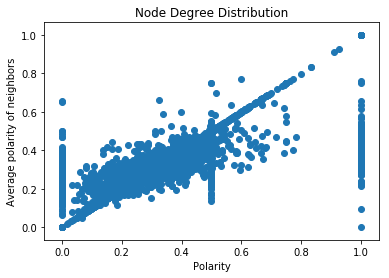

In [46]:
import matplotlib.pyplot as plt
plot_degree_distribution()

In [55]:
from operator import itemgetter
import operator 
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []

    frequencies = {}
    for node in Graph.Nodes():
        count = node.GetDeg() 
        if count not in frequencies:
            frequencies[count] = 1
        else:
            frequencies[count] += 1
    curr_count = 0
    print len(frequencies)
    max_number = max(frequencies.iteritems(), key=operator.itemgetter(0))[0]
    print max_number
    cumulative_counts = []
    for i in range(max_number): 
        if i in frequencies: 
            curr_count += frequencies[i] * i
        cumulative_counts.append(curr_count)
    
    return cumulative_counts

cumulative_counts = getDataPointsToPlot(LinkGraph)


497
24147


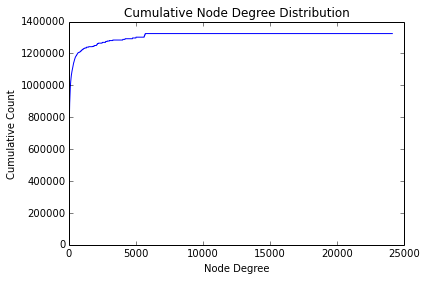

In [59]:
plt.title("Cumulative Node Degree Distribution")
plt.xlabel("Node Degree")
plt.ylabel("Cumulative Count")
plt.plot(range(len(cumulative_counts)), cumulative_counts)

In [61]:
DomainCounts['dailynews.com']

344

In [64]:
top_news_sources = ['abcnews.go.com', 'cbsnews.com', 'cnn.com', 'foxnews.com', 'msnbc.com', 'nytimes.com', 'latimes.com',\
                   'usatoday.com', 'wsj.com', 'washingtonpost.com', 'bloomberg.com', 'vice.com', 'huffingtonpost.com', 'npr.org']

In [96]:
len(top_news_sources)

14

In [ ]:
conservative = ['foxnews.com', 'washingtonpost.com', 'theguardian.com', 'nypost.com', 'bloomberg.com', '']
liberal = ['nytimes.com', 'theatlantic.com', 'washingtonpost.com', 'huffingtonpost.com', 'vice.com', 'sfgate.com', '']
neutral = ['usatoday.com', 'cnn.com', 'bbc.com']

In [48]:
def printNeighborsAtHop(url, hops):
    node_id = domainToNodeID[url]
    NodeVec = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, node_id, hops, NodeVec, True)
    print NodeVec.Len()
    for item in NodeVec:
        domain = IDtoDomain[item]
        if domain in TopDomains:
            print domain

In [70]:
start_id = domainToNodeID["foxnews.com"]
results = []

for news_source in top_news_sources: 
    node_id = domainToNodeID[news_source]
    Length = snap.GetShortPath(LinkGraph, start_id, node_id)
    results.append((news_source, Length))
print results

[('abcnews.go.com', 2), ('cbsnews.com', 1), ('cnn.com', 1), ('foxnews.com', 0), ('msnbc.com', 2), ('nytimes.com', 1), ('latimes.com', 1), ('usatoday.com', 1), ('wsj.com', 1), ('washingtonpost.com', 1), ('bloomberg.com', 1), ('vice.com', 2), ('huffingtonpost.com', 1), ('npr.org', 2)]


In [71]:
start_id = domainToNodeID["nytimes.com"]
results = []

for news_source in top_news_sources: 
    node_id = domainToNodeID[news_source]
    Length = snap.GetShortPath(LinkGraph, start_id, node_id)
    results.append((news_source, Length))
print results

[('abcnews.go.com', 1), ('cbsnews.com', 1), ('cnn.com', 1), ('foxnews.com', 1), ('msnbc.com', 1), ('nytimes.com', 0), ('latimes.com', 1), ('usatoday.com', 1), ('wsj.com', 1), ('washingtonpost.com', 1), ('bloomberg.com', 1), ('vice.com', 1), ('huffingtonpost.com', 1), ('npr.org', 1)]


In [99]:
farthest_distance = -1
max_pair = ()
results = []

for news_source1 in top_news_sources:
    for news_source2 in top_news_sources: 
        if news_source1==news_source2:
            continue
        node_id1 = domainToNodeID[news_source1]
        node_id2 = domainToNodeID[news_source2]
        Length1 = snap.GetShortPath(LinkGraph, node_id1, node_id2)
        Length2 = snap.GetShortPath(LinkGraph, node_id2, node_id1)
        distance = max(Length1, Length2)
        results.append(((news_source1, news_source2), distance))

In [107]:
count = 0
for i in range(14):
    count += i
print count

91


In [102]:
count1 = 0
count2 = 0
count3 = 0

for result in results:
    if result[1] == 1:
        count1 += 1
    elif result[1] == 2:
        count2 += 1
    else:
        count3 += 1
    

In [104]:
results

[(('abcnews.go.com', 'cbsnews.com'), 2),
 (('abcnews.go.com', 'cnn.com'), 1),
 (('abcnews.go.com', 'foxnews.com'), 2),
 (('abcnews.go.com', 'msnbc.com'), 2),
 (('abcnews.go.com', 'nytimes.com'), 1),
 (('abcnews.go.com', 'latimes.com'), 2),
 (('abcnews.go.com', 'usatoday.com'), 1),
 (('abcnews.go.com', 'wsj.com'), 2),
 (('abcnews.go.com', 'washingtonpost.com'), 1),
 (('abcnews.go.com', 'bloomberg.com'), 2),
 (('abcnews.go.com', 'vice.com'), 2),
 (('abcnews.go.com', 'huffingtonpost.com'), 1),
 (('abcnews.go.com', 'npr.org'), 1),
 (('cbsnews.com', 'abcnews.go.com'), 2),
 (('cbsnews.com', 'cnn.com'), 1),
 (('cbsnews.com', 'foxnews.com'), 1),
 (('cbsnews.com', 'msnbc.com'), 2),
 (('cbsnews.com', 'nytimes.com'), 1),
 (('cbsnews.com', 'latimes.com'), 1),
 (('cbsnews.com', 'usatoday.com'), 1),
 (('cbsnews.com', 'wsj.com'), 1),
 (('cbsnews.com', 'washingtonpost.com'), 1),
 (('cbsnews.com', 'bloomberg.com'), 2),
 (('cbsnews.com', 'vice.com'), 2),
 (('cbsnews.com', 'huffingtonpost.com'), 1),
 (('

In [ ]:
farthest_distance = -1
max_pair = ()
common_neighbors = []

for news_source1 in top_news_sources:
    for news_source2 in top_news_sources: 
        if news_source1 == news_source2:
            continue
        node_id1 = domainToNodeID[news_source1]
        node_id2 = domainToNodeID[news_source2]
        Nbrs = snap.TIntV()
        snap.GetCmnNbrs(LinkGraph, node_id1, node_id2, Nbrs)
        
        distance = Nbrs.Len()
        
        NodeVec = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, node_id1, 1, NodeVec, False)
        count1 = NodeVec.Len() 
        NodeVec = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, node_id2, 1, NodeVec, False)
        count2 = NodeVec.Len()
        denominator = min(count1, count2)        
        common_neighbors.append(((news_source1, news_source2), distance/float(denominator)))

In [93]:
common_neighbors

[(('abcnews.go.com', 'cbsnews.com'), 0.3514644351464435),
 (('abcnews.go.com', 'cnn.com'), 0.4726962457337884),
 (('abcnews.go.com', 'foxnews.com'), 0.2883959044368601),
 (('abcnews.go.com', 'msnbc.com'), 0.4117647058823529),
 (('abcnews.go.com', 'nytimes.com'), 0.5665529010238908),
 (('abcnews.go.com', 'latimes.com'), 0.31399317406143346),
 (('abcnews.go.com', 'usatoday.com'), 0.3703071672354949),
 (('abcnews.go.com', 'wsj.com'), 0.3447098976109215),
 (('abcnews.go.com', 'washingtonpost.com'), 0.5546075085324232),
 (('abcnews.go.com', 'bloomberg.com'), 0.30204778156996587),
 (('abcnews.go.com', 'vice.com'), 0.18592964824120603),
 (('abcnews.go.com', 'huffingtonpost.com'), 0.40955631399317405),
 (('abcnews.go.com', 'npr.org'), 0.27474402730375425),
 (('cbsnews.com', 'abcnews.go.com'), 0.3514644351464435),
 (('cbsnews.com', 'cnn.com'), 0.4560669456066946),
 (('cbsnews.com', 'foxnews.com'), 0.29916317991631797),
 (('cbsnews.com', 'msnbc.com'), 0.36764705882352944),
 (('cbsnews.com', 'nyt

In [95]:
from operator import itemgetter

print max(common_neighbors,key=itemgetter(1))
print min(common_neighbors,key=itemgetter(1))

(('msnbc.com', 'nytimes.com'), 0.6985294117647058)
(('msnbc.com', 'vice.com'), 0.1323529411764706)


In [113]:
farthest_distance = -1
max_pair = ()
common_neighbors = []

for news_source1 in top_news_sources:
    for news_source2 in top_news_sources: 
        if news_source1 == news_source2:
            continue
        node_id1 = domainToNodeID[news_source1]
        node_id2 = domainToNodeID[news_source2]
        
        NodeVec1 = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, node_id1, 2, NodeVec1, False)
        count1 = NodeVec1.Len() 
        
        NodeVec2 = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, node_id2, 2, NodeVec2, False)
        count2 = NodeVec2.Len()
        
        nodes_1 = []
        nodes_2 = []
        for item in NodeVec1:
            nodes_1.append(item)
        for item in NodeVec2: 
            nodes_2.append(item)
            
        intersection = len(list(set(nodes_1) & set(nodes_2)))
        
        denominator = min(len(nodes_1), len(nodes_2))        
        common_neighbors.append(((news_source1, news_source2), intersection/float(denominator)))

In [114]:
print max(common_neighbors,key=itemgetter(1))
print min(common_neighbors,key=itemgetter(1))

(('msnbc.com', 'latimes.com'), 0.9641341980787048)
(('wsj.com', 'npr.org'), 0.7527530641448392)


In [121]:
common_neighbors = sorted(common_neighbors, key=itemgetter(1), reverse=True)
for result in common_neighbors:
    if result[0][1] == 'nytimes.com': 
        print result

(('msnbc.com', 'nytimes.com'), 0.9328278148924758)
(('cbsnews.com', 'nytimes.com'), 0.9288963860348617)
(('cnn.com', 'nytimes.com'), 0.92171736798744)
(('abcnews.go.com', 'nytimes.com'), 0.9216555022240976)
(('vice.com', 'nytimes.com'), 0.9144191426918875)
(('npr.org', 'nytimes.com'), 0.9087911404218254)
(('foxnews.com', 'nytimes.com'), 0.8958316457951949)
(('latimes.com', 'nytimes.com'), 0.8868552903035661)
(('wsj.com', 'nytimes.com'), 0.8832681391723772)
(('usatoday.com', 'nytimes.com'), 0.8777611856192945)
(('bloomberg.com', 'nytimes.com'), 0.8694601469756925)
(('washingtonpost.com', 'nytimes.com'), 0.8577147445738174)
(('huffingtonpost.com', 'nytimes.com'), 0.8434992079389393)


In [120]:
for result in common_neighbors:
    if result[0][1] == 'foxnews.com': 
        print result

(('npr.org', 'foxnews.com'), 0.7932347271048326)
(('latimes.com', 'foxnews.com'), 0.8052229980397557)
(('cnn.com', 'foxnews.com'), 0.813501385131304)
(('huffingtonpost.com', 'foxnews.com'), 0.8171950686085505)
(('wsj.com', 'foxnews.com'), 0.8183614949697863)
(('abcnews.go.com', 'foxnews.com'), 0.8360321395291594)
(('cbsnews.com', 'foxnews.com'), 0.8437526623387688)
(('usatoday.com', 'foxnews.com'), 0.8507136261279505)
(('bloomberg.com', 'foxnews.com'), 0.8537268942278096)
(('nytimes.com', 'foxnews.com'), 0.8958316457951949)
(('washingtonpost.com', 'foxnews.com'), 0.9007403567320621)
(('vice.com', 'foxnews.com'), 0.9025085152417471)
(('msnbc.com', 'foxnews.com'), 0.9306578241576047)


In [ ]:
keys = IDtoDomain.keys()

key_list = []

for i in range(len(keys)):
    for j in range(i + 1, len(keys)): 
        node_1 = keys[i]
        node_2 = keys[j]
        Length1 = snap.GetShortPath(LinkGraph, node_1, node_2)
        Length2 = snap.GetShortPath(LinkGraph, node_2, node_1)
        min_length = min(Length1, Length2)
        max_length = max(Length1, Length2)
        key_list.append( ((node_1, node_2), min_length, max_length))

In [61]:
LinkGraph.GetNodes()

380807

In [62]:
right = set(['https://www.libertynation.com', 'http://brexitcentral.com', 'http://www.oann.com', 'http://dailysignal.com', 'http://www.heritage.org', 'https://www.yaf.org', 'https://americanmilitarynews.com', 'http://controversialtimes.com', 'https://www.americanewshub.com', 'http://www.youngcons.com', 'http://www.jewishworldreview.com', 'https://www.conservativewoman.co.uk', 'http://libertynews.com', 'http://libertytalk.fm', 'http://patriotnewsdaily.com', 'http://knoxreport.com', 'https://acculturated.com', 'https://www.firstthings.com', 'http://disobedientmedia.com', 'http://www.foxnews.com', 'http://www.futureinamerica.com', 'http://www.mrc.org', 'http://www.torontosun.com', 'https://www.ontarioproud.ca', 'http://www.g-a-i.org', 'https://www.conservativeshere.com', 'http://notliberal.com', 'http://www.thenewamerican.com', 'http://humanevents.com', 'https://ca-political.com', 'https://offgridsurvival.com', 'http://www.teapartytribune.com', 'http://spiked-online.com', 'https://www.citizenfreepress.com', 'http://www.opslens.com', 'https://conservativetoday.com', 'https://renewedright.com', 'http://debatepost.com', 'http://redalertpolitics.com', 'https://lifeandabout.com', 'http://www.wnd.com', 'https://www.alec.org', 'https://hillarydaily.com', 'https://theconservativetreehouse.com', 'http://www.ronpaullibertyreport.com', 'http://therightscoop.com', 'https://aclj.org', 'https://www.dangerous.com', 'https://www.westernjournal.com', 'https://www.chroniclesmagazine.org', 'https://www.christiannewsalerts.com', 'https://patriotpost.us', 'https://www.whitehouse.gov', 'https://www.campusreform.org', 'http://www.freerepublic.com', 'http://www.redflagnews.com', 'https://www.thesun.co.uk', 'http://www.newsmax.com', 'https://sentinelksmo.org', 'http://crimeresearch.org', 'http://ipatriot.com', 'http://www.campaignlifecoalition.com', 'http://thedailydefender.com', 'https://altnewsmedia.net', 'http://www.cscmediagroupus.com', 'http://www.therebel.media', 'https://www.conservativereview.com', 'http://www.onenewsnow.com', 'http://silenceisconsent.net', 'http://theresurgent.com', 'http://www.hudson.org', 'http://www.resistancemedia.org', 'http://newlypress.com', 'http://www.weeklystandard.com', 'https://ifstudies.org', 'https://ricochet.com', 'https://uspoliticsinfo.com', 'http://www.westernjournalism.com', 'http://www.independentsentinel.com', 'http://www.dcstatesman.com', 'http://observer.com', 'https://www.americandailynews.org', 'https://www.mercatornet.com', 'https://loneconservative.com', 'http://www.standpointmag.co.uk', 'http://libertyhangout.org', 'https://mediaequalizer.com', 'http://www.americanlibertyreport.com', 'http://www.colddeadhands.us', 'http://biggovernment.news', 'https://themilreview.com', 'http://townhall.com', 'https://www.aei.org', 'https://keepandbear.com', 'https://www.commentarymagazine.com', 'http://thehayride.com', 'http://erlc.com', 'http://www.dailytelegraph.com.au', 'https://www.hermancain.com', 'http://www.dailywire.com', 'http://www.christianpost.com', 'http://www.defenddemocracy.org', 'https://www.nccivitas.org', 'https://conservativebase.com', 'http://www.allenbwest.com', 'https://www.lifesitenews.com', 'http://iwf.org', 'http://www.thepostemail.com', 'http://tennesseestar.com', 'https://kansaspolicy.org', 'http://www.conservativehq.com', 'https://farleftwatch.com', 'http://cowgernation.com', 'https://www.conservativeoutfitters.com', 'http://twitchy.com', 'http://www.adelaidenow.com.au', 'http://politi.site', 'https://www.churchmilitant.com', 'https://www.illinoispolicy.org', 'http://www.teapartypatriots.org', 'https://2ndvote.com', 'http://www.familysecuritymatters.org', 'https://americanconsequences.com', 'http://www.acting-man.com', 'http://dailycaller.com', 'https://pjmedia.com', 'http://www.usapoliticstoday.com', 'http://www.newsbusters.org', 'http://politichicks.com', 'https://home.nra.org', 'http://politifeed.net', 'https://bearingarms.com', 'http://projectveritas.com', 'http://www.drudgereport.com', 'http://firstinfreedomdaily.com', 'http://www.newrevolutionnow.org', 'https://order-order.com', 'http://sonorannews.com', 'http://www.lifezette.com', 'https://www.ac2news.com', 'https://www.tpusa.com', 'http://freedomcrossroads.com', 'http://www.americanthinker.com', 'https://deplorablesreport.com', 'http://thefederalist.com', 'http://awm.com', 'http://conservativesus.party', 'https://www.populistwire.com', 'http://www.investors.com', 'http://dcwhispers.com', 'http://federalistpress.com', 'http://www.theamericancause.org', 'http://legalinsurrection.com', 'https://regated.com', 'http://www.westernfreepress.com', 'https://ntknetwork.com', 'https://energycitizens.org', 'http://www.aim.org', 'http://www.nationalreview.com', 'https://unitynewsnetwork.co.uk', 'http://www.ronpaulinstitute.org', 'http://www.thecollegefix.com', 'http://www.thepoliticalinsider.com', 'http://tribunist.com', 'https://beinglibertarian.com', 'http://bigleaguepolitics.com', 'http://www.whatfinger.com', 'https://ijr.com', 'http://www.beliefnet.com', 'https://www.guerrilla.news', 'https://www.unwatch.org', 'http://www.weaselzippers.us', 'http://therantidote.com', 'https://world.wng.org', 'http://spectator.org', 'http://offendedamerica.com', 'http://www.gopusa.com', 'http://www.secureamericanow.org', 'http://www.crisismagazine.com', 'http://www.unbiasedamerica.com', 'http://dailysurge.com', 'https://savejersey.com', 'http://www.bizpacreview.com', 'https://www.rd.com', 'https://www.jewishpolicycenter.org', 'http://www.dailysabah.com', 'http://www.thedailyliberator.com', 'https://www.theconservativenut.gop', 'http://www.unionleader.com', 'http://nextnewsnetwork.com', 'http://www.washingtonexaminer.com', 'https://arizonadailyindependent.com', 'https://imprimis.hillsdale.edu', 'https://www.mediacircus.com', 'http://freewestmedia.com', 'http://www.vivaliberty.com', 'https://therealstrategy.com', 'https://www.numbersusa.com', 'http://worldtribune.com', 'http://ibleedredwhiteblue.com', 'http://www.thetruthaboutguns.com', 'http://www.ammoland.com', 'https://fedsoc.org', 'http://fightpp.org', 'https://www.heartland.org', 'http://bluelivesmatter.blue', 'http://www.theblaze.com', 'http://vesselnews.io', 'https://thecitizenpress.com', 'http://theblacksphere.net', 'http://www.intellectualtakeout.org', 'http://www.express.co.uk', 'https://capitalresearch.org', 'https://www.aa.com.tr', 'http://heatst.com', 'http://freebeacon.com', 'https://www.tasnimnews.com', 'http://citizensunited.org', 'https://judicialnetwork.com', 'http://www.lifenews.com', 'http://politicsnote.com', 'https://www.conservativeinstitute.org', 'http://www.powerlineblog.com', 'http://www.conservativedailynews.com', 'https://publicinterestlegal.org', 'http://www.faithwire.com', 'https://www.clear-politics.com', 'https://www.ff.org', 'https://www.getreligion.org', 'http://carepublican.com', 'http://www.restoreamericanglory.com', 'http://www.libertyheadlines.com', 'http://factsandlogic.org', 'http://alphanewsmn.com', 'http://sbgi.net', 'https://www.lyincomey.com', 'http://yellowhammernews.com', 'http://ussanews.com', 'http://www.economicpolicyjournal.com', 'http://www.tehrantimes.com', 'http://patriotretort.com', 'https://www.academia.org', 'https://quadrant.org.au', 'http://www.hoover.org', 'https://www.thepostmillennial.com', 'http://www.freedomworks.org', 'http://www.dailymail.co.uk', 'http://newbostonpost.com', 'https://amgreatness.com', 'https://www.gatestoneinstitute.org', 'http://www.city-journal.org', 'http://www.chicksontheright.com', 'https://en.mehrnews.com', 'https://www.gop.com', 'http://www.nationalcenter.org', 'https://www.trtworld.com', 'http://louderwithcrowder.com'])

In [63]:
left = set(['drudge.com', 'washingtonsources.org', 'akkadiantimes.com', 'deadstate.org', 'thelasource.com', 'americablog.com', 'meduza.io', 'thenewcivilrightsmovement.com', 'newstatesman.com', 'wonkette.com', 'mirror.co.uk', 'libcom.org', 'deepleftfield.info', 'intrepidreport.com', 'rawprogressive.com', 'viraltitle.com', 'worldcantwait.net', 'happy-foxie.com', 'newint.org', 'revcom.us', 'lavendermagazine.com', 'newrepublic.com', 'washingtonpress.com', 'theimproper.com', 'nationofchange.org', 'projectcensored.org', 'peacock-panache.com', 'newpol.org', 'democracyguardian.com', 'dallasvoice.com', 'uproxx.com', 'jezebel.com', 'bluedotdaily.com', 'content.news', 'boingboing.net', 'blacklivesmatter.com', 'reverepress.com', 'whatmattersnews.com', 'au.org', 'hrc.org', 'impeachdjtnow.com', 'leftoverrights.com', 'progressivefrontier.com', 'putintrump.org', 'progressive.org', 'newshounds.us', 'liberationnews.org', 'certifiedpolitics.com', 'angrywhitemen.org', 'forwardprogressives.com', 'theintellectualist.co', 'smirkingchimp.com', 'elitedaily.com', 'leftwingnation.org', 'daily49er.com', 'itsgoingdown.org', 'jacobinmag.com', 'tribunemagazine.org', 'leftscoop.com', 'democraticunderground.com', 'yesmagazine.org', 'newyorker.com', 'theroot.com', 'fifthestate.org', 'electronicintifada.net', 'allthatsfab.com', 'upworthy.com', 'moonofalabama.org', 'themaven.net', 'freepress.org', 'salon.com', 'carbonated.tv', 'mondoweiss.net', 'austinchronicle.com', 'globalvoices.org', 'thedailyvox.co.za', 'yourblackworld.net', 'meanlefthook.com', 'backedbyfact.com', 'gizmodo.com', 'liberalexaminer.com', 'care2.com', 'dctribune.org', 'leftfootforward.org', 'workers.org', 'newslogue.com', 'rewire.news', 'pravdareport.com', 'gq.com', 'foreignpolicyjournal.com', 'redpepper.org.uk', 'act.tv', 'leftsideofhistory.com', 'redyouth.org', 'politicaldig.com', 'crooksandliars.com', 'americanbridgepac.org', 'commondreams.org', 'chicagoreader.com', 'marxist.com', 'dailydot.com', 'nymag.com', 'guardianlv.com', 'telesurtv.net', 'pinknews.co.uk', 'filmingcops.com', 'photographyisnotacrime.com', 'washingtonmonthly.com', 'republicanssucks.org', 'theuspoliticalpost.com', 'ebar.com', 'politicususa.com', 'iowastartingline.com', 'lgbtqnation.com', 'blackagendareport.com', 'foreignpolicynews.org', 'opednews.com', 'thenation.com', 'pastemagazine.com', 'proudemocrat.com', 'thedailybanter.com', 'washingtonjournal.com', 'loveknowledge.org', 'codepink.org', 'worldsocialism.org', 'breitbartunmasked.com', 'samuel-warde.com', 'dailydems.com', 'advocate.com', 'internationalviewpoint.org', 'progressivearmy.com', 'aidc.org.za', 'samefacts.com', 'thefloridasqueeze.com', 'freedomnews.org.uk', 'people.com', 'elisabethparker.com', 'politicalupdater.com', 'earthfirstjournal.org', 'nowthisnews.com', 'wearyourvoicemag.com', 'chroniclesofdemocracy.com', 'thefrisky.com', 'modernliberals.com', 'blue-route.org', 'resilience.org', 'afj.org', 'gopocalypse.org', 'north99.org', 'curvemag.com', 'esquire.com', 'citizencritics.org', 'shadowproof.com', 'readingthepictures.org', 'ir.net', 'leftvoice.org', 'takepart.com', 'democracynow.org', 'other98.com', 'inthesetimes.com', 'scarymommy.com', 'dailykos.com', 'deepstatenation.com', 'feministcurrent.com', 'verrit.com', 'morningstaronline.co.uk', 'currentaffairs.org', 'bust.com', 'dieharddemocrat.com', 'rantt.com', 'littlegreenfootballs.com', 'citypaper.com', 'usuncut.com', 'extranewsfeed.com', 'evonomics.com', 'mashable.com', 'americanprogress.org', 'towleroad.com', 'verifiedpolitics.com', 'syriana-analysis.com', 'nap-sack.org', 'nova-magazine.net', 'tytnetwork.com', 'truth-out.org', 'dissentmagazine.org', 'theguardiansofdemocracy.com', 'redstatedisaster.com', 'nationalmemo.com', 'truthagainstthemachine.com', 'thinkprogress.org', 'countercurrents.org', 'frnewsreport.com', 'zcomm.org', 'mediamatters.org', 'theoswatch.com', 'thegrio.com', 'splinternews.com', 'the-daily.buzz', 'economyincrisis.org', 'texasobserver.org', 'electoral-vote.com', 'antifascistnews.net', 'truthdig.com', 'desmogblog.com', 'liberalamerica.org', 'motherjones.com', 'talkingpointsmemo.com', 'pressprogress.ca', 'ourvoiceny.com', 'addictinginfo.com', 'vox.com', 'everydayfeminism.com', 'merryjane.com', 'vanityfair.com', 'change.org', 'deadspin.com', 'inequalitymedia.org', 'queerty.com', 'rightwingwatch.org', 'front.moveon.org', 'theestablishment.co', 'cnntimes.online', 'pfaw.org', 'revolution-news.com', 'onegreenplanet.org', 'vermontindependent.org', 'prwatch.org', 'slate.com', 'bluenationreview.com', 'greenleft.org.au', 'themilitant.com', 'popularresistance.org', 'ips-dc.org', 'thelily.com', 'whowhatwhy.org', 'readersupportednews.org', 'news.groopspeak.com', 'thesternfacts.com', 'canadiandimension.com', 'rawstory.com', 'vote.us.org', 'molad.org', 'newscorpse.com', 'nowtoronto.com', 'dailynewsbin.com', 'bradford-delong.com', 'dailyrecord.co.uk', 'rabble.ca', 'progressiveliberal.net', 'theburningspear.com', 'bitchmedia.org', 'good.is', 'cnn.com', 'americanindependent.com', 'feministing.com', 'counterpunch.org', 'crimethinc.com', 'middleeastmonitor.com', 'crooked.com', 'huffingtonpost.com', 'freespeech.org', 'climaterealityproject.org', 'firstpost.com', 'egbertowillies.com', 'theoutline.com', 'stpete4peace.org', 'bluestatedaily.com', 'prospect.org', 'msmagazine.com', 'cosmopolitan.com', 'mediaite.com', 'rappler.com', 'villagevoice.com', 'thedailybeast.com', 'socialistworker.org', 'autostraddle.com', 'alternet.org', 'latest.com', 'shareblue.com', 'trofire.com', 'newsweek.com', 'palmerreport.com', 'sourcewatch.org', 'americannewsx.com', 'globetoday.com', 'miaminewtimes.com', 'themarysue.com', 'thewalrus.ca', 'this.org', 'thelondoneconomic.com', 'democratichub.com', 'thecanary.co', 'juancole.com', 'greenvillegazette.com'])

In [64]:
len(right)

257

In [65]:
len(left)

294

In [66]:
domainToNodeID["foxnews.com"]

76

In [67]:
domainToNodeID["nytimes.com"]

191

In [99]:
right_mapping = []
left_mapping = []
fox_news_id =  domainToNodeID["foxnews.com"]
ny_times_id = domainToNodeID["nytimes.com"]


NIdCCfH = snap.TIntFltH()
snap.GetNodeClustCf(LinkGraph, NIdCCfH)

def commonNeighbors(node_id1, node_id2):
    Nbrs = snap.TIntV()
    snap.GetCmnNbrs(LinkGraph, node_id1, node_id2, Nbrs)

    distance = Nbrs.Len()
    if distance == 0: 
        return 0

    NodeVec = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, node_id1, 1, NodeVec, False)
    count1 = NodeVec.Len() 
    NodeVec = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, node_id2, 1, NodeVec, False)
    count2 = NodeVec.Len()
    denominator = min(count1, count2) 
    
    return float(distance)/denominator

for r_article in right: 
    if r_article not in domainToNodeID:
        continue 
    node_id = domainToNodeID[r_article]
    node = LinkGraph.GetNI(node_id)
    node_degree = node.GetDeg() 
    clustering_coefficient = NIdCCfH[node_id]
    Length1 = snap.GetShortPath(LinkGraph, node_id, ny_times_id)
    Length2 = snap.GetShortPath(LinkGraph, node_id, fox_news_id)
    distance = max(Length1, Length2)
    
    NYTimesNeighbors = commonNeighbors(node_id, ny_times_id)
    FoxNewsNeighbors = commonNeighbors(node_id, fox_news_id)
    right_mapping.append([node_degree, clustering_coefficient, Length1, Length2, NYTimesNeighbors, FoxNewsNeighbors])

for l_article in left: 
    if l_article not in domainToNodeID:
        continue 
    node_id = domainToNodeID[l_article]
    node = LinkGraph.GetNI(node_id)
    node_degree = node.GetDeg() 
    clustering_coefficient = NIdCCfH[node_id]
    Length1 = snap.GetShortPath(LinkGraph, node_id, ny_times_id)
    Length2 = snap.GetShortPath(LinkGraph, node_id, fox_news_id)
    distance = max(Length1, Length2)
    
    NYTimesNeighbors = commonNeighbors(node_id, ny_times_id)
    FoxNewsNeighbors = commonNeighbors(node_id, fox_news_id)
    left_mapping.append([node_degree, clustering_coefficient, Length1, Length2, NYTimesNeighbors, FoxNewsNeighbors])


    


In [103]:
left_mapping

[[1, 0.0, 3, 3, 0, 0],
 [2, 0.0, 2, 3, 1.0, 0],
 [1, 0.0, 3, 3, 0, 0],
 [63, 0.18688524590163935, 1, 2, 0.5901639344262295, 0.3442622950819672],
 [39, 0.06906906906906907, 1, 2, 0.32432432432432434, 0.2702702702702703],
 [4, 0.0, 2, 2, 0.5, 0.5],
 [227, 0.09538950715421304, 1, 1, 0.47297297297297297, 0.2702702702702703],
 [1, 0.0, 2, 2, 1.0, 1.0],
 [46, 0.049682875264270614, 2, 2, 0.36363636363636365, 0.1590909090909091],
 [28, 0.16, 2, 2, 0.5384615384615384, 0.3076923076923077],
 [4, 0.0, 2, 3, 0.25, 0],
 [106, 0.1498738109105028, 1, 2, 0.5392156862745098, 0.30392156862745096],
 [3, 0.3333333333333333, 2, 2, 0.6666666666666666, 0.6666666666666666],
 [3, 0.0, 2, 2, 0.6666666666666666, 0.6666666666666666],
 [15, 0.10256410256410256, 2, 2, 0.3076923076923077, 0.15384615384615385],
 [60, 0.05513784461152882, 2, 2, 0.40350877192982454, 0.21052631578947367],
 [79, 0.08526315789473685, 2, 2, 0.3815789473684211, 0.23684210526315788],
 [15, 0.15384615384615385, 2, 2, 0.5384615384615384, 0.3846

In [86]:
node = LinkGraph.GetNI(277784)

In [87]:
node.GetDeg()

2

In [72]:
print len(left_mapping)

192


In [92]:
print len(right_mapping)

156


In [80]:
a = 'https://www.libertynation.com'
print a[len("https://"):]

www.libertynation.com


In [83]:
new_right = []
for right_domain in right:
    def extractDomain(rawURL):
        parsedUrl = urlparse(rawURL)
        if parsedUrl.netloc.startswith('www.'):
            return parsedUrl.netloc[4:]
        return parsedUrl.netloc
    domain = extractDomain(right_domain)
    new_right.append(domain)
right = new_right

In [94]:
left_mapping["drudge.com"]

[12, 0.4888888888888889, 1, 2, 0.7, 0.6]

In [98]:
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier()

In [107]:
from random import shuffle

left = shuffle(left_mapping)
right = shuffle(right_mapping) 

idx = int(len(left_mapping) * 0.8)
left_train = left_mapping[:idx]
left_test = left_mapping[idx:]

idx = int(len(right_mapping) * 0.8)
right_train = right_mapping[:idx]
right_test = right_mapping[idx:]


In [110]:
import numpy as np
left_numpy =np.array([np.array(xi) for xi in left_train])
right_numpy = np.array([np.array(xi) for xi in right_train])
total_array = np.vstack([left_numpy, right_numpy])

In [112]:
y = [0] * len(left_train) + [1] * len(right_train)

In [114]:
len(y)


277

In [115]:
clf.fit(total_array, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [117]:
#mau lihat F1-Score
from sklearn.metrics import f1_score

Y_pred = clf.predict(total_array) #prediksi data cross validation menggunakan model tadi
print Y_pred
score = f1_score(y, Y_pred, average="micro") 

print("Gradient Boosting Tree F1-score: "+str(score)) # I got 0.86 F1-Score

[0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
Gradient Boosting Tree F1-score: 0.873646209386


In [118]:
import numpy as np
left_numpy =np.array([np.array(xi) for xi in left_test])
right_numpy = np.array([np.array(xi) for xi in right_test])
total_array = np.vstack([left_numpy, right_numpy])

y = [0] * len(left_test) + [1] * len(right_test)

In [120]:
Y_pred = clf.predict(total_array)
score = f1_score(y, Y_pred, average="micro") 
print score

0.661971830986


In [123]:
from xgboost import XGBClassifier 
model = XGBClassifier() 

import numpy as np
left_numpy =np.array([np.array(xi) for xi in left_train])
right_numpy = np.array([np.array(xi) for xi in right_train])
x_train_array = np.vstack([left_numpy, right_numpy])
y_train = [0] * len(left_train) + [1] * len(right_train)

left_numpy =np.array([np.array(xi) for xi in left_test])
right_numpy = np.array([np.array(xi) for xi in right_test])
x_test_array = np.vstack([left_numpy, right_numpy])

y_test = [0] * len(left_test) + [1] * len(right_test)


model.fit(x_train_array, y_train,
        eval_set=[(x_train_array, y_train), (x_test_array, y_test)],
        eval_metric='logloss',
        verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.676134	validation_1-logloss:0.675901
[1]	validation_0-logloss:0.662501	validation_1-logloss:0.664279
[2]	validation_0-logloss:0.649726	validation_1-logloss:0.653522
[3]	validation_0-logloss:0.639399	validation_1-logloss:0.643212
[4]	validation_0-logloss:0.628305	validation_1-logloss:0.63858
[5]	validation_0-logloss:0.619998	validation_1-logloss:0.629545
[6]	validation_0-logloss:0.610921	validation_1-logloss:0.622544
[7]	validation_0-logloss:0.600986	validation_1-logloss:0.617111
[8]	validation_0-logloss:0.594104	validation_1-logloss:0.611735
[9]	validation_0-logloss:0.586839	validation_1-logloss:0.606247
[10]	validation_0-logloss:0.580611	validation_1-logloss:0.601603
[11]	validation_0-logloss:0.575816	validation_1-logloss:0.59613
[12]	validation_0-logloss:0.571297	validation_1-logloss:0.592755
[13]	validation_0-logloss:0.565437	validation_1-logloss:0.589025
[14]	validation_0-logloss:0.560733	validation_1-logloss:0.58702
[15]	validation_0-logloss:0.555576	val

AttributeError: 'GradientBoostingClassifier' object has no attribute 'evals_result'

In [124]:
Y_pred = clf.predict(x_train_array) #prediksi data cross validation menggunakan model tadi
score = f1_score(y_train, Y_pred, average="micro") 

In [125]:
score

0.87364620938628157

In [126]:
Y_pred = clf.predict(x_test_array) #prediksi data cross validation menggunakan model tadi
score = f1_score(y_test, Y_pred, average="micro") 

In [127]:
score

0.6619718309859155

<Container object of 6 artists>

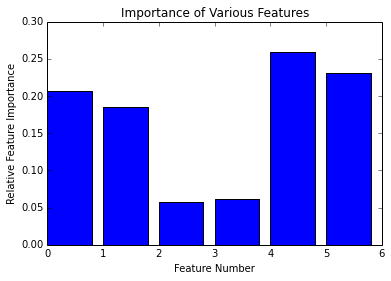

In [130]:
plt.title("Importance of Various Features")
plt.xlabel("Feature Number")
plt.ylabel("Relative Feature Importance")
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
